In [51]:
%load_ext autoreload

%autoreload 2
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import rdAbbreviations
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import AllChem, rdFMCS
from rdkit.Chem import rdDepictor
from DFTStructureGenerator import Tool

In [ ]:

abbrevs = rdAbbreviations.GetDefaultAbbreviations()
custom_abbrevs = rdAbbreviations.ParseAbbreviations('''Ph c1ccccc1
''')
for abbrev in abbrevs:
    custom_abbrevs.append(abbrev)
abbrevs = custom_abbrevs
opts = rdMolDraw2D.MolDrawOptions()
opts.baseFontSize = 0.8  

In [4]:
reactant_csv = pd.read_csv("Data_clear_with_sites.csv")
binol_csv = reactant_csv.loc[reactant_csv["Type"] == "Binol"]
ligand_csv = reactant_csv.loc[(reactant_csv['Type']!= "Binol")]


In [ ]:

opts = rdMolDraw2D.MolDrawOptions()
opts.baseFontSize = 0.8  

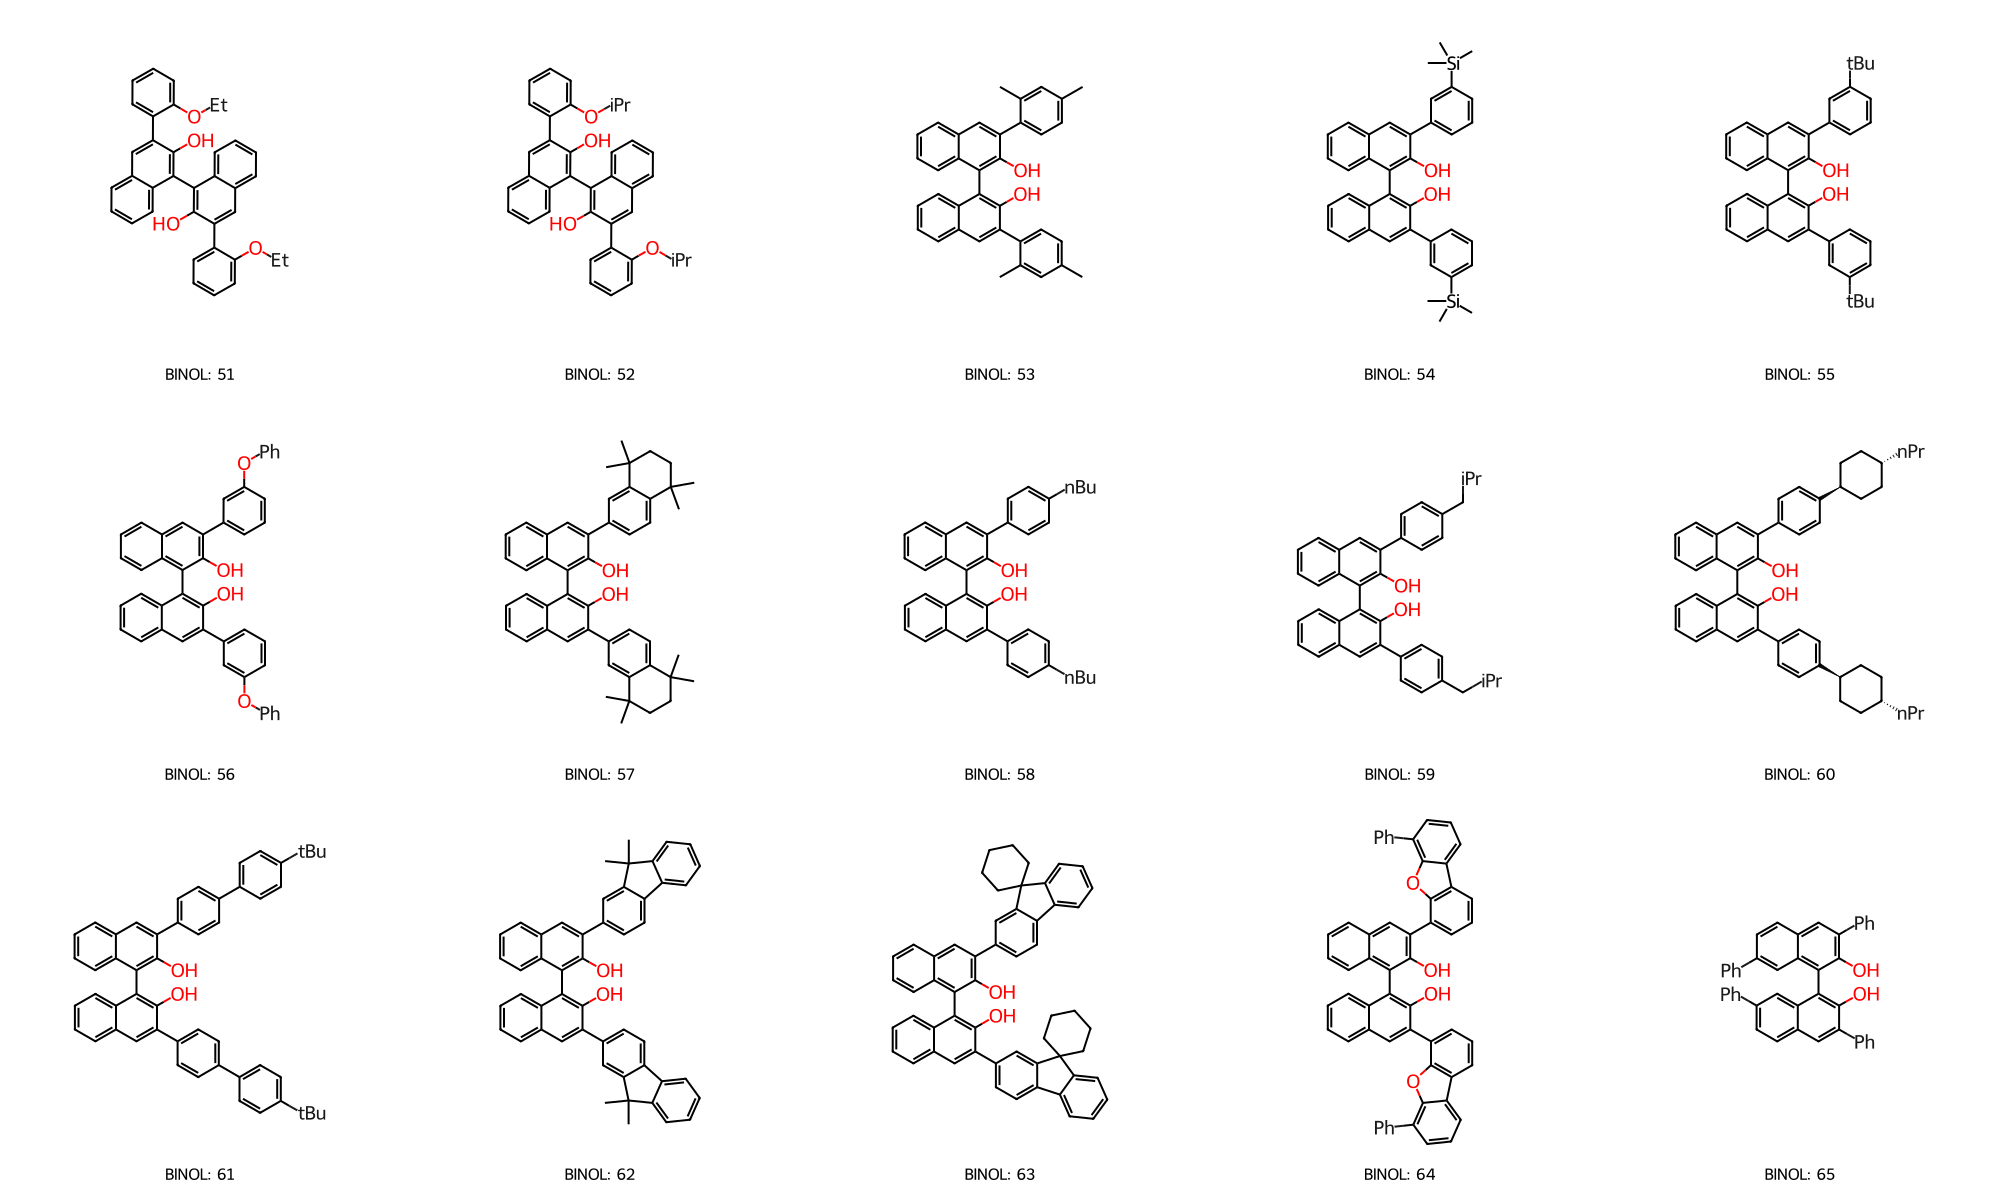

In [ ]:

rdDepictor.SetPreferCoordGen(True)
start_id = 50
end_id = start_id + 50
csv_ = binol_csv

mols = [rdAbbreviations.CondenseMolAbbreviations(Chem.MolFromSmiles(each), abbrevs, maxCoverage=1) for each in csv_['Smiles']][start_id:end_id]
# template = Chem.MolFromSmarts("Oc1ccccc1-c1ccccc1O")
# AllChem.Compute2DCoords(template)
template = Chem.MolFromMolFile(f"Figure/BINOL_patten0.mol")

aligned_queries = []
for mol in mols:
    AllChem.Compute2DCoords(mol)  
    AllChem.GenerateDepictionMatching2DStructure(mol, template) 
    aligned_queries.append(mol)
mols = aligned_queries
Chem.Draw.MolsToGridImage(mols, 
                          molsPerRow=5, subImgSize=(400, 400), useSVG=True, 
                          legends = ["BINOL: " + str(each) for each in csv_['Index']][start_id:end_id], 
                          drawOptions=opts)

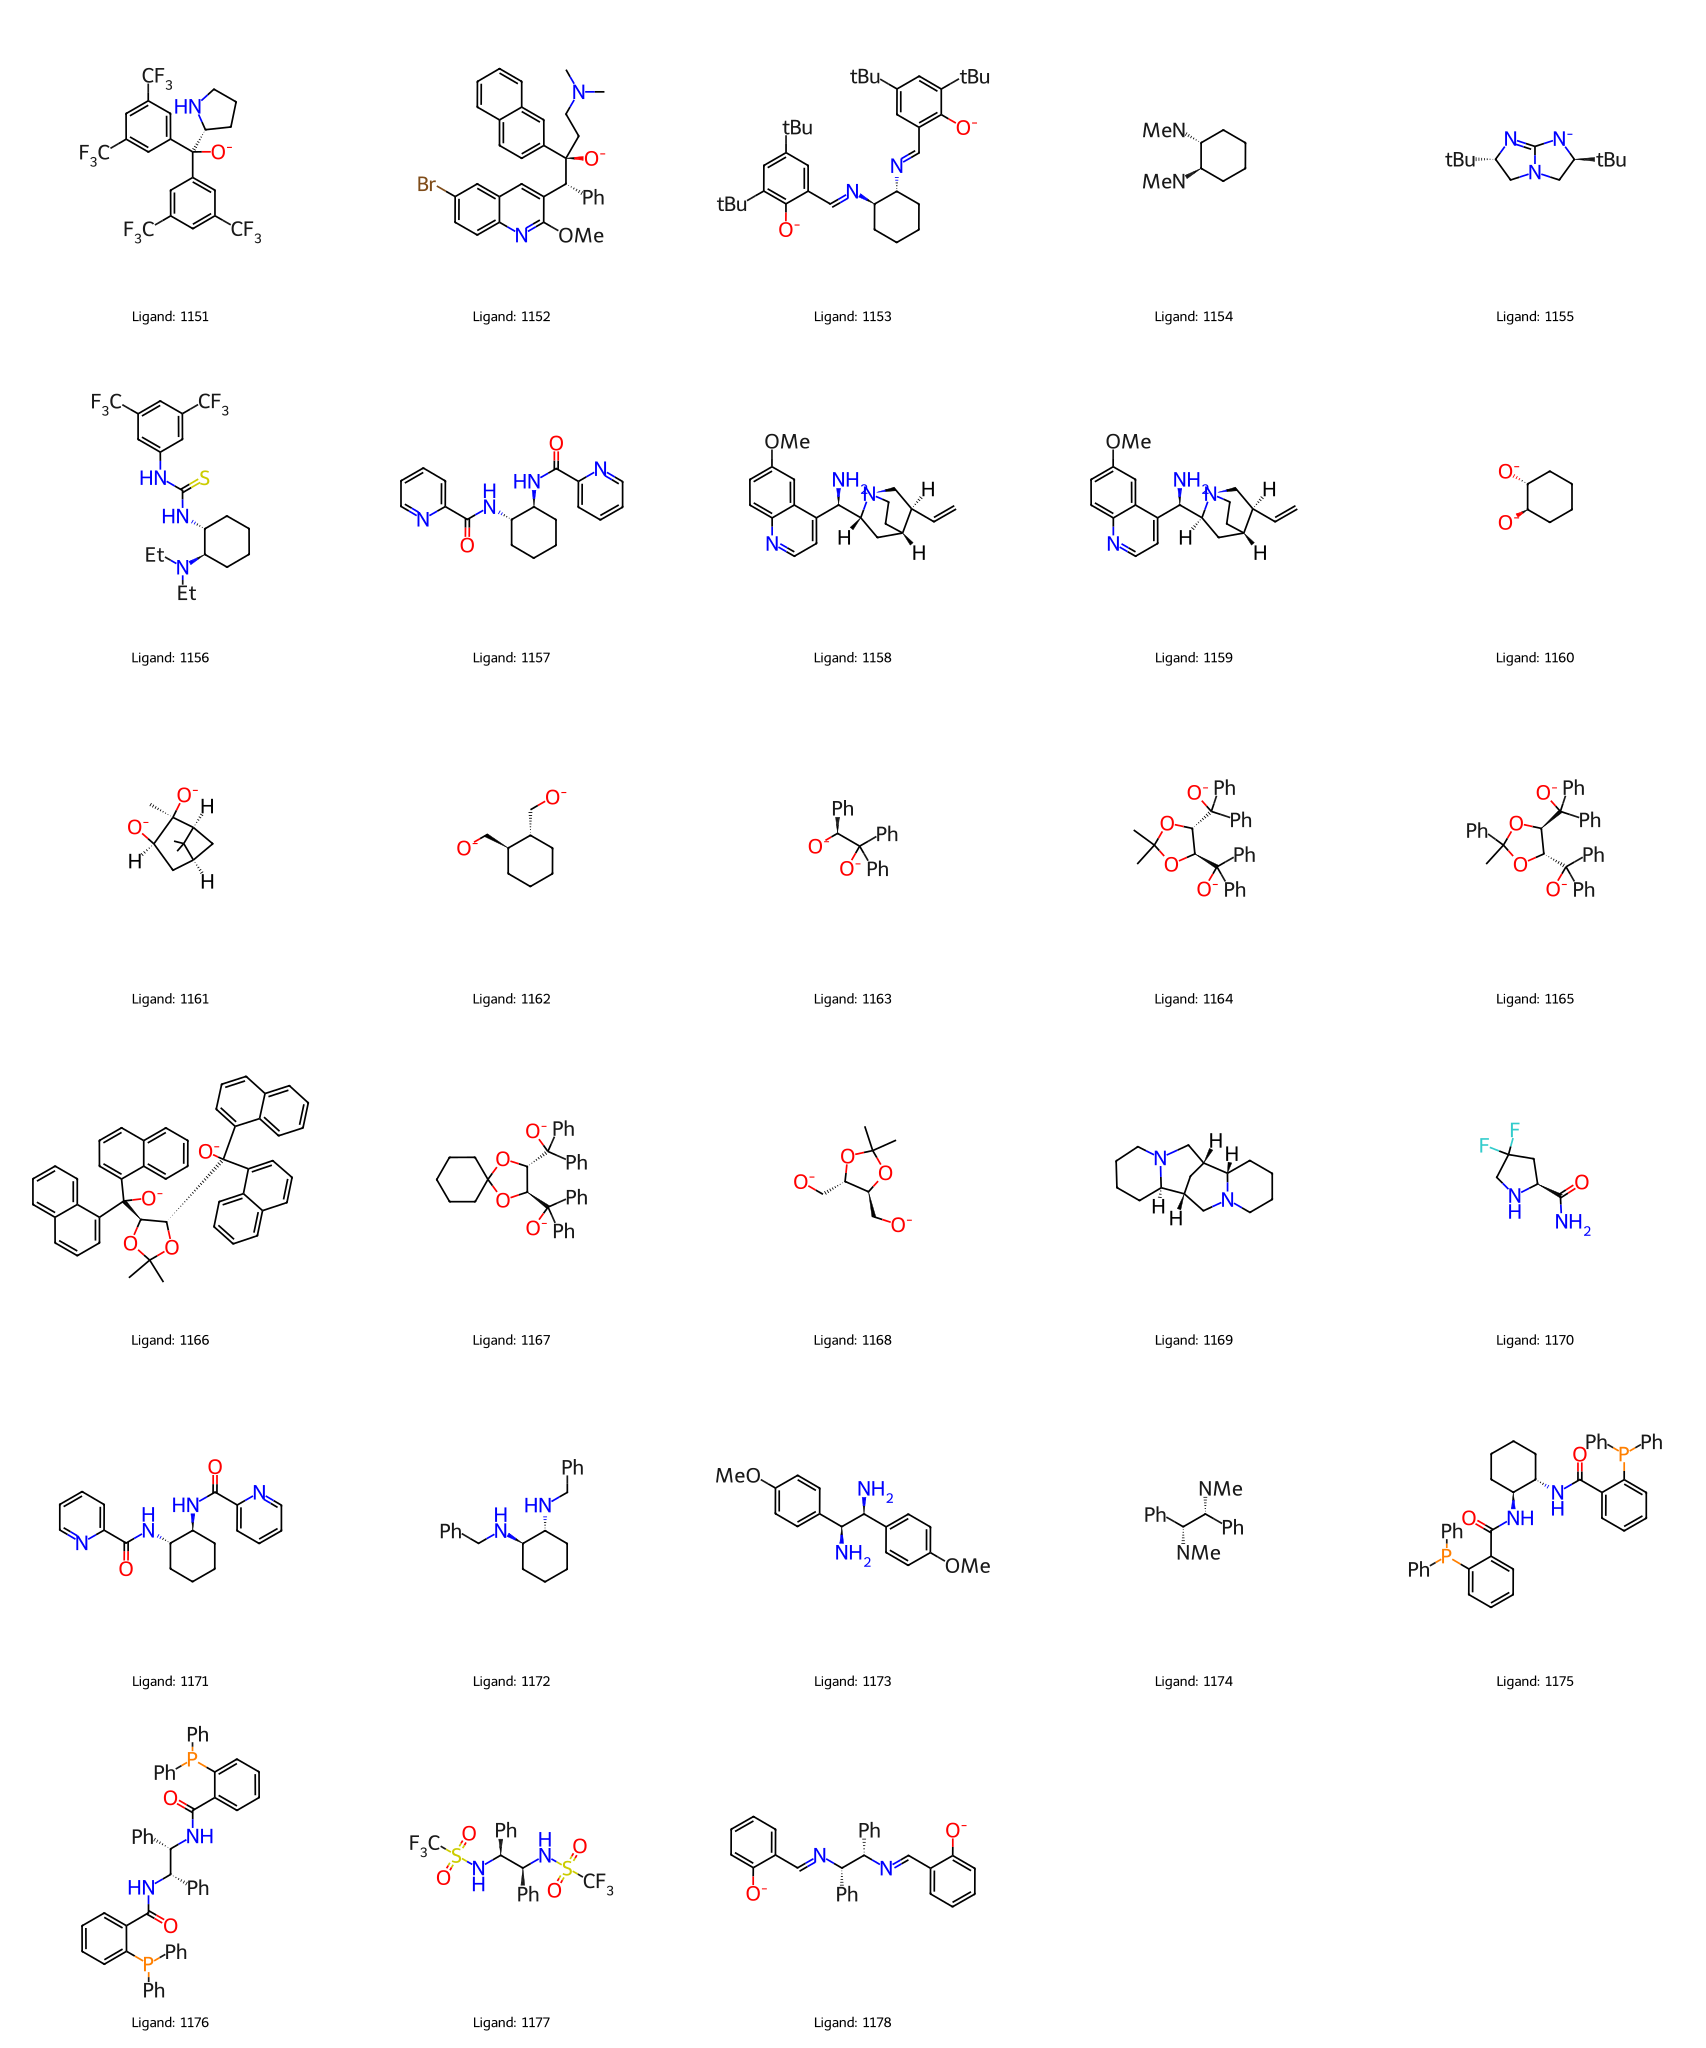

In [ ]:

rdDepictor.SetPreferCoordGen(True)
start_id = 150
end_id = start_id + 50
csv_ = ligand_csv

aligned_queries = []
mols = [rdAbbreviations.CondenseMolAbbreviations(Chem.MolFromSmiles(each), abbrevs, maxCoverage=1) for each in csv_['Smiles']][start_id:end_id]
# for mol in mols:
#     AllChem.Compute2DCoords(mol)  
#     AllChem.GenerateDepictionMatching2DStructure(mol, template)  
#     aligned_queries.append(mol)
# mols = aligned_queries
Chem.Draw.MolsToGridImage(mols, 
                          molsPerRow=5, subImgSize=(400, 400), useSVG=True, 
                          legends = ["Ligand: " + str(each) for each in csv_['Index']][start_id:end_id], 
                          drawOptions=opts)

In [33]:
pattens = ['C1(CC2=NCCO2)=NCCO1', 'C1(C2=NCCO2)=NC(C3=NCCO3)=CC=C1', "C1(C2=NCCO2)=N[C@H2]CO1", "C1(C2=NCCO2)=CC=CC=N1", "C1(C2=NCCN2)=NCCN1"]
pattens = [Chem.MolToSmiles(Chem.MolFromSmiles(each)) for each in pattens]
pattens

['C1COC(CC2=NCCO2)=N1',
 'c1cc(C2=NCCO2)nc(C2=NCCO2)c1',
 'C1COC(C2=NCCO2)=N1',
 'c1ccc(C2=NCCO2)nc1',
 'C1CNC(C2=NCCN2)=N1']

In [34]:
pattens = ['C1COC(CC2=NCCO2)=N1', 'c1cc(C2=NCCO2)nc(C2=NCCO2)c1', 'C1COC(C2=NCCO2)=N1', 'c1ccc(C2=NCCO2)nc1', 'C1CNC(C2=NCCN2)=N1']
pattens = [Chem.MolToSmiles(Chem.MolFromSmiles(each)) for each in pattens]
isother = True
all_ligand_split = [[] for each in range(len(pattens) + 2)]
all_ligand_id = [[] for each in range(len(pattens) + 2)]
for row_id, row in ligand_csv.iterrows():
    for pattens_id, patten in enumerate(pattens):
        if Chem.MolFromSmiles(row['Smiles']).HasSubstructMatch(Chem.MolFromSmarts(patten)):
            isother = False
            all_ligand_split[pattens_id].append(row['Smiles'])
            all_ligand_id[pattens_id].append(row['Index'])
            break
    if isother:
        if row['Type'] == 'Ligand_Box':
            all_ligand_split[-2].append(row['Smiles'])
            all_ligand_id[-2].append(row['Index'])
        else:
            all_ligand_split[-1].append(row['Smiles'])
            all_ligand_id[-1].append(row['Index'])
    isother = True
[len(each) for each in all_ligand_split]

[61, 7, 8, 31, 7, 25, 39]

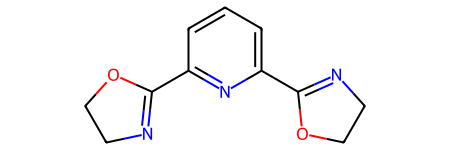

In [30]:
Chem.MolFromSmiles(pattens[1])

In [ ]:
from rdkit.Chem import AllChem, rdFMCS
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(False)
start_id = 0
split_id = 0
end_id = start_id + 50
csv_ = ligand_csv

mols = [rdAbbreviations.CondenseMolAbbreviations(Chem.MolFromSmiles(each), abbrevs, maxCoverage=1) for each in all_ligand_split[split_id]][start_id:end_id]
# template = Chem.MolFromSmiles(pattens[split_id])
template = Chem.MolFromMolFile(f"Figure/ligand_patten{split_id}.mol")
# AllChem.Compute2DCoords(template)
aligned_queries = []
for mol in mols:
    AllChem.Compute2DCoords(mol)
    # mcs = rdFMCS.FindMCS([template, mol])
    # patt = Chem.MolFromSmarts(mcs.smartsString)
    # query_match = mol.GetSubstructMatch(patt)
    # template_match = template.GetSubstructMatch(patt)
    # AllChem.AlignMol(mol, template, atomMap=list(zip(query_match, template_match)))
    AllChem.GenerateDepictionMatching2DStructure(mol, template)  # 匹配模板
    aligned_queries.append(mol)
mols = aligned_queries
Chem.Draw.MolsToGridImage(mols, 
                          molsPerRow=5, subImgSize=(400, 400), useSVG=True, 
                          legends = ["Ligand: " + str(each) for each in all_ligand_id[split_id]][start_id:end_id], 
                          drawOptions=opts)

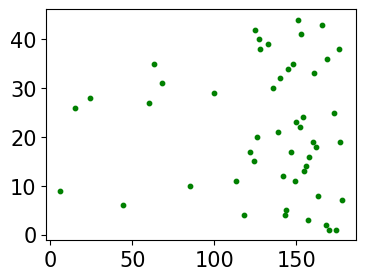

In [31]:
# Figure S3 Distribution in First Selection
csv = f"Data/Iteration_2/Iteration_Data/iter_{0:05}.csv"
df = pd.read_csv(csv)
binol_ids = df['Binol'].to_numpy()
ligand_ids = df['Ligand'].to_numpy() - 1000
plt.figure(figsize=(4,3))
plt.scatter(ligand_ids, binol_ids, s=10, c='green')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("Figure/Figure_S3_Distribution_in_First_Selection.png", dpi=300, bbox_inches='tight')

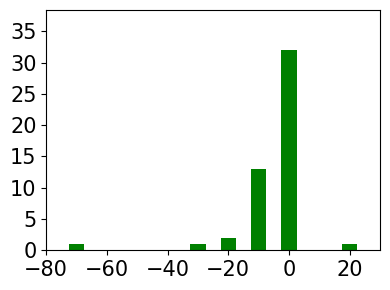

array([ 1,  0,  0,  0,  1,  2, 13, 32,  0,  1])

In [30]:
df = pd.read_csv(r"Data\Iteration_2\Result\BINOL_result_0000.csv")
Tool.calc_distribution2(df['R'] - df['S'], 10, ylab="")

# Draw HPLC

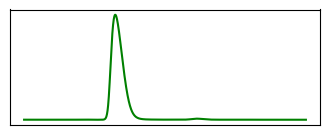

In [46]:
hplc_df = pd.read_csv("HPLC.csv")
plt.figure(figsize=(4,1.5))
plt.plot(hplc_df['A'][2000:4000], hplc_df['B'][2000:4000], c='green')
plt.xticks([])
plt.yticks([])
plt.savefig("Figure/Figure_3_HPLC.png", dpi=300, bbox_inches='tight')

# Model Uncertainty

In [ ]:
# Full Space Prediction
from DFTStructureGenerator import DFThandle
import pickle
from catboost import CatBoostRegressor

with open(r"Data/all_fp_map.pkl", 'rb')as f:
    qm_dict, area_dict = pickle.load(f)
smiles_csv = pd.read_csv("Data_clear_with_sites.csv")
binol_csv = smiles_csv.loc[smiles_csv['Type'] == 'Binol']
important_binol_id = np.arange(max(binol_csv['Index'].to_list())+1)
full_data_csv = pd.read_csv('Data/Iteration_2/Full_Space_20251029.csv')
first_data_csv = DFThandle.read_reaction_csv(rf'Data\Iteration_2\Result\BINOL_result_sum_{14:04}.csv')
old_desc_array = DFThandle.descriptor_to_array(first_data_csv, None, [qm_dict, area_dict])
old_y = first_data_csv['R'].to_numpy() - first_data_csv["S"].to_numpy()
model = CatBoostRegressor(task_type="CPU", iterations=10000, learning_rate=0.01, depth=6, verbose=0, random_state = 0, loss_function='RMSEWithUncertainty')
model.fit(old_desc_array, old_y)
new_desc_array = DFThandle.descriptor_to_array(full_data_csv, None, [qm_dict, area_dict])
new_result, new_uncertainty = model.predict(new_desc_array).T
full_data_csv['Uncertainty'] = new_uncertainty
full_data_csv.to_csv(f"Data/Recommended/Uncertainty_11_08_{14:04}.csv", index=False)

In [56]:
a = new_uncertainty.reshape(178, 65)

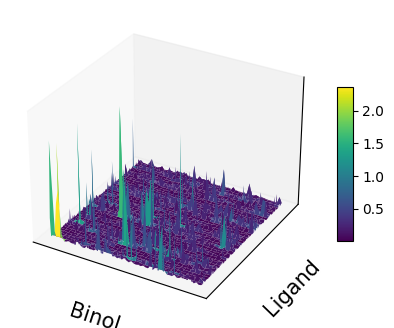

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 用于 3D 投影

x = np.linspace(-5, 5, 65)
y = np.linspace(-5, 5, 178)
X, Y = np.meshgrid(x, y)
Z = a  

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

# 绘制表面
surf = ax.plot_surface(X, Y, Z, cmap='viridis',
                       linewidth=0, antialiased=True)

# 添加颜色条
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# 设置标签
ax.set_xlabel('Binol', fontsize=15)
ax.set_ylabel('Ligand', fontsize=15)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.grid(False)
plt.savefig("Figure/Figure_3_Model_Uncertainty.png", dpi=300, bbox_inches='tight')
plt.show()